#Analysis of Heart disease prediction

The primary goal of this protofilo is to predicting if an individual has heart disease and answer the following questions. Using logistic regression and KNN classification to make predictions, and compare the model performance with confusion matrix.

Questions:

*   Which gender is more likely to have heart disease?
*   Which types of chest pain is more likely to leading to heart disease?
*   Which factors or attrbutes are much important to predict heart disease?



The dataset can be found on [Kaggle](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data). The dataset contains following attributes:


*   **Age**
*   **gender** (1 = male, 0 = female)
*   **Chest pain types** ( 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 =  asymptomatic)
*   **resting bp s**: resting blood pressure
*   **cholesterol**: serum cholesterol
*   **Fasting blood sugar**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   **resting ecg**: Resting electrocardiogram results ( 0 = normal, 1 =  having ST-T wave abnormality (T wave inversions
and/or ST elevation or depression of > 0.05 mV)
, 2 = showing probable or definite left ventricular
hypertrophy by Estes criteria)
*   **max heart rate**: Maximum heart rate achieved
*   **exercise angina**: Exercise induced angina (1 = Yes, 0 = No):
*   **ST slope**: The slope of the peak excerise ST segment ( 1 = upsloping, 2 = flat, 3 = downsloping)
*   **Target** < Target variable > (1 = heart disease, 0 = Normal)

In [ ]:
name = "Tzu-Yu, Liu"
student_id = '47989130'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #Log_reg
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import GridSearchCV # Tuning

#Importing dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COMP2200/protofilo4/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,ST slope,target
0,40,1,2,140,289,0,0,172,0,1,0
1,49,0,3,160,180,0,0,156,0,2,1
2,37,1,2,130,283,0,1,98,0,1,0
3,48,0,4,138,214,0,0,108,1,2,1
4,54,1,3,150,195,0,0,122,0,1,0


In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  1190 non-null   int64
 1   sex                  1190 non-null   int64
 2   chest pain type      1190 non-null   int64
 3   resting bp s         1190 non-null   int64
 4   cholesterol          1190 non-null   int64
 5   fasting blood sugar  1190 non-null   int64
 6   resting ecg          1190 non-null   int64
 7   max heart rate       1190 non-null   int64
 8   exercise angina      1190 non-null   int64
 9   ST slope             1190 non-null   int64
 10  target               1190 non-null   int64
dtypes: int64(11)
memory usage: 102.4 KB


#cleaning data


In [ ]:
#checking if there are null values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
ST slope               0
target                 0
dtype: int64

In [ ]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

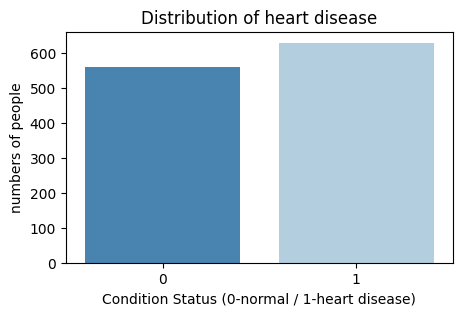

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(df,x = "target",palette='Blues_r')
plt.title('Distribution of heart disease')
plt.ylabel('numbers of people')
plt.xlabel('Condition Status (0-normal / 1-heart disease)')
plt.show()

The bar graph shows the distribution of heart disease conditions. 0 represents the people having healthy hearts, and 1 represents the people having heart disease. As can be seen from the chart, the difference between the two sample sizes is not that large. Therefore, the model has a lower chance of getting bias model.

###Q1 - Which gender is more likely to have heart disease?

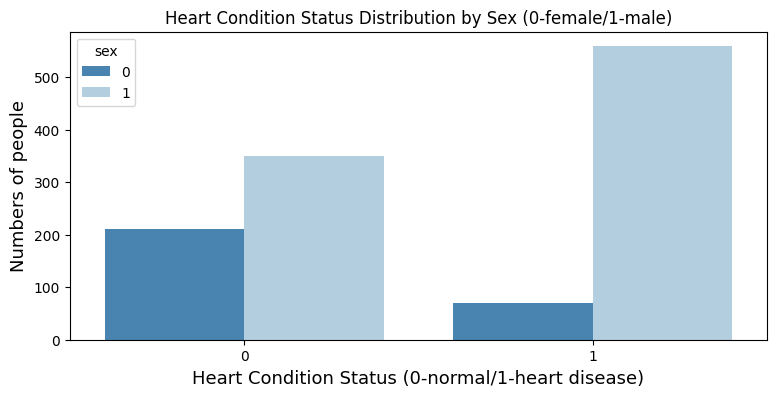

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(df,x = 'target',hue="sex",palette='Blues_r')
plt.xlabel('Heart Condition Status (0-normal/1-heart disease)',fontsize =13)
plt.ylabel('Numbers of people',fontsize = 13)
plt.title('Heart Condition Status Distribution by Sex (0-female/1-male)')
plt.show()

The bar graph shows the distribution of the heart health condition by gender.

*   In the gender label (sex): 0 represents females and 1 represents males.
*   in the heart condition label: 0 represents health and 1 represents with heart disease.

According to the chart, the numbers of male patients with heart disease is significantly higher than the figures for female patients, showing males may be more likely to have heart disease.



### Q2 - Which types of chest pain is more likely to leading to heart disease?

Text(0.5, 1.0, '(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)')

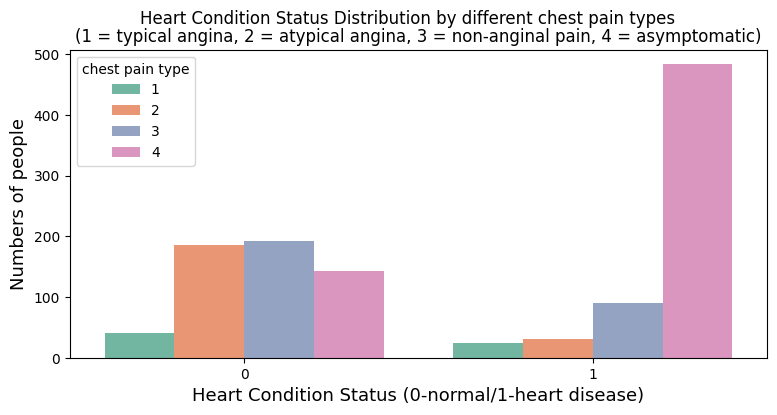

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(df,x = 'target',hue="chest pain type",palette='Set2')
plt.xlabel('Heart Condition Status (0-normal/1-heart disease)',fontsize =13)
plt.ylabel('Numbers of people',fontsize = 13)
plt.suptitle('Heart Condition Status Distribution by different chest pain types')
plt.title('(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)')

The bar chart illustrates the distribution of heart health conditions in patients with 4 different types of chest pain.

Chest pain types are numbered from 1 to 4:
1 represents typical angina,2 represents atypical angina, 3 represents non-anginal chest pain, and 4 represents asymptomatic.

From the graph, the number of people with asymptomatic chest pain and heart disease is far more than the number of people does not have heart disease but with chest pain, showing that the patients may by high risk for heart disease with asymptomatic chest pain symptoms than those with typical symptoms.


###Q3 - Which factors or attrbutes are much important to predict heart disease?

#Correlation

In [ ]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['target']
corr_with_target

age                    0.262029
sex                    0.311267
chest pain type        0.460127
resting bp s           0.121415
cholesterol           -0.198366
fasting blood sugar    0.216695
resting ecg            0.073059
max heart rate        -0.413278
exercise angina        0.481467
ST slope               0.505608
target                 1.000000
Name: target, dtype: float64

In [ ]:
#The absolute value of the correlation coefficient indicates the strength of the relationship between the variables.
abs_value_corr_with_target = corr_with_target
for i in range(0,len(abs_value_corr_with_target)):
  if abs_value_corr_with_target[i] < 0:
    abs_value_corr_with_target[i] = -abs_value_corr_with_target[i]
abs_value_corr_with_target
the_order_adding_features = abs_value_corr_with_target.sort_values(ascending=False)
#ordering from 1 to -1
the_order_adding_features

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64

In [ ]:
#check the train accuracy along with adding features
#in the ascending order of the changes of magnitude of the correlation coefficient
def find_train_acc(n):
  features_name_list = []
  train_acc_list=[]
  for names in the_order_adding_features.index[1:]:
    features_name_list.append(names)
  for i in range(0,len(features_name_list)):
    temp_list = features_name_list[:i+1]
    train, test = train_test_split(df, test_size = 0.2, random_state=n)
    X_train = train[temp_list]
    y_train = train[['target']]

    X_test = test[temp_list]
    y_test = test[['target']]

    log_r = LogisticRegression()
    log_r.fit(X_train,y_train)

    result_for_train_set = log_r.predict(X_train)
    result_for_test_set = log_r.predict(X_test)

    train_accuracy = accuracy_score(y_train,result_for_train_set)
    test_accuracy = accuracy_score(y_test,result_for_test_set)
    train_acc_list.append(train_accuracy)
  return train_acc_list

In [ ]:
#check the test accuracy along with adding features
#in the ascending order of the changes of magnitude of the correlation coefficient
def find_test_acc(n):
  features_name_list = []
  test_acc_list=[]
  for names in the_order_adding_features.index[1:]:
    features_name_list.append(names)
  for i in range(0,len(features_name_list)):
    temp_list = features_name_list[:i+1]
    train, test = train_test_split(df, test_size = 0.2, random_state=n)
    X_train = train[temp_list]
    y_train = train[['target']]

    X_test = test[temp_list]
    y_test = test[['target']]

    log_r = LogisticRegression()
    log_r.fit(X_train,y_train)

    result_for_train_set = log_r.predict(X_train)
    result_for_test_set = log_r.predict(X_test)

    train_accuracy = accuracy_score(y_train,result_for_train_set)
    test_accuracy = accuracy_score(y_test,result_for_test_set)
    test_acc_list.append(test_accuracy)
  return test_acc_list

In [ ]:
# plot lines graphs
x = range(1,11)
y1 = find_train_acc(42)
y2 = find_test_acc(42)

y3 = find_train_acc(142)
y4 = find_test_acc(142)

y5 = find_train_acc(800)
y6 = find_test_acc(800)

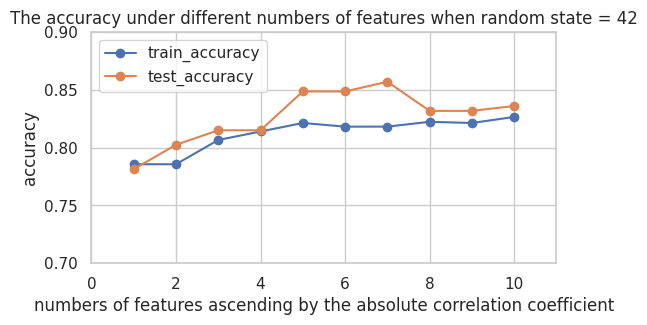

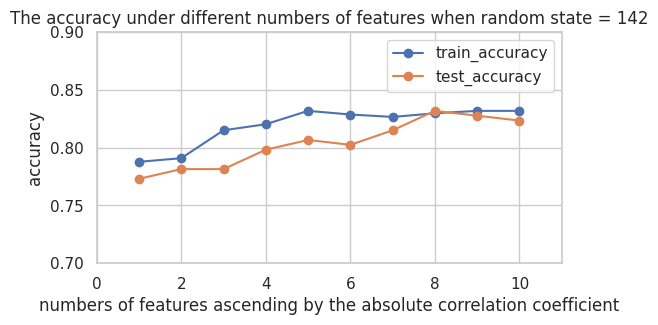

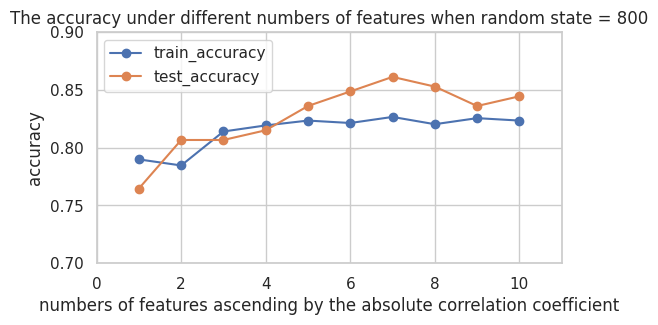

In [ ]:
# plot lines graphs
sns.set(style = 'whitegrid')
plt.subplots(figsize=(6, 3))
plt.plot(x , y1, label = "train_accuracy",marker="o")
plt.plot(x , y2, label = "test_accuracy",marker="o")
plt.grid(True)
plt.xlim(0,11)
plt.ylim(0.7,0.9)
plt.xlabel('numbers of features ascending by the absolute correlation coefficient')
plt.ylabel('accuracy')
plt.title('The accuracy under different numbers of features when random state = 42')
plt.legend()

plt.subplots(figsize=(6, 3))
plt.plot(x , y3, label = "train_accuracy",marker="o")
plt.plot(x , y4, label = "test_accuracy",marker="o")
plt.xlim(0,11)
plt.ylim(0.7,0.9)
plt.xlabel('numbers of features ascending by the absolute correlation coefficient')
plt.ylabel('accuracy')
plt.title('The accuracy under different numbers of features when random state = 142')
plt.legend()

plt.subplots(figsize=(6, 3))
plt.plot(x , y5, label = "train_accuracy",marker="o")
plt.plot(x , y6, label = "test_accuracy",marker="o")
plt.xlim(0,11)
plt.ylim(0.7,0.9)
plt.xlabel('numbers of features ascending by the absolute correlation coefficient')
plt.ylabel('accuracy')
plt.title('The accuracy under different numbers of features when random state = 800')
plt.legend()

plt.show()

**Explanation**

These charts show the trend of train accuracy and test accuracy by adding the features under different random statuses. The order of adding features is based on how strong the correlation between the feature and the target. In this way, I am able to select those attributes that are great for predicting heart disease and obtain a model with better performance.

*   Train accuracy represents the proportion of correct predictions made by the model on the training dataset.

*   Test accuracy illustrates how well a machine learning model performs on unseen data.

**Evaluation**

Originally, I had doubts about the excessive number of features, since it normally will not be that high, so I also checked the train-test-split test under different random states to verify if the 7 features were just caused by coincidence. However, according to the 2nd and 3rd graphs from the above, both of the charts indicate that the model with 7 selected features has better performance than others. Therefore, these 7 features, including 'ST slope', 'exercise angina', 'chest pain type', 'max heart rate', 'sex', 'age', and 'fasting blood sugar', are important features to predict heart disease.



#compare the model using different training methods

##1. Logistic regression

In [ ]:
train, test = train_test_split(df,test_size = 0.2,random_state=42)
X_train = train[['ST slope', 'exercise angina', 'chest pain type', 'max heart rate', 'sex', 'age', 'fasting blood sugar']]
y_train = train[['target']]

X_test = test[['ST slope','exercise angina','chest pain type','max heart rate','sex', 'age', 'fasting blood sugar']]
y_test = test[['target']]

log_r = LogisticRegression(max_iter = 200)
log_r.fit(X_train,y_train)

result_for_train_set = log_r.predict(X_train)
result_for_test_set = log_r.predict(X_test)

train_accuracy = accuracy_score(y_train,result_for_train_set)
test_accuracy = accuracy_score(y_test,result_for_test_set)

print("Training Set Accuracy: ",train_accuracy)
print("Testing Set Accuracy: ", test_accuracy)

Training Set Accuracy:  0.8182773109243697
Testing Set Accuracy:  0.8571428571428571


evalute the logistic model using K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kf = KFold(n_splits = 10, shuffle = True,random_state=42)
log_r_cv_scores = cross_val_score(log_r,X_train,y_train,scoring='accuracy',cv=kf)

In [ ]:
#accuracy raye of single fold
print("CV Scores: ", log_r_cv_scores)
#average accuracy
print("Average CV Score: ", log_r_cv_scores.mean())

CV Scores:  [0.82291667 0.82291667 0.85263158 0.81052632 0.82105263 0.77894737
 0.83157895 0.78947368 0.86315789 0.77894737]
Average CV Score:  0.8172149122807018


**Evaluation**

In CV scores, we can see the accuracy rates from every single fold range from a low of 77.9% to a high of 86.3%. This suggests that the model may have a certain degree of volatility on different subsets of data. However, from the average CV, we know this score reflects the average performance of the model across all folds, making this evaluation method more resistant to the effects of chance than a single train/test split.

# 2. KNN classification

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors= 6)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
result_for_train_set = knn_classifier.predict(X_train)
result_for_test_set = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, result_for_train_set)
test_accuracy = accuracy_score(y_test, result_for_test_set)

print("Training Set Accuracy: ", train_accuracy)
print("Testing Set Accuracy: ", test_accuracy)

Training Set Accuracy:  0.7878151260504201
Testing Set Accuracy:  0.7016806722689075


#Tuning KNN

In [ ]:
#adjusting k-value
k_params = {'n_neighbors':range(3,300)}

tunning_knn = GridSearchCV(knn_classifier, k_params ,scoring = 'accuracy',cv=10)

In [ ]:
tunning_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': range(3, 300)}, scoring='accuracy')

In [ ]:
results = tunning_knn.cv_results_
mean_accuracy = results['mean_test_score'] #average of 10 folds under same k
knn_params = results['params']

In [ ]:
k_value_ = [] # all k_value have run through tunnning
for k in knn_params:
  k_value = k['n_neighbors']
  k_value_.append(k_value)

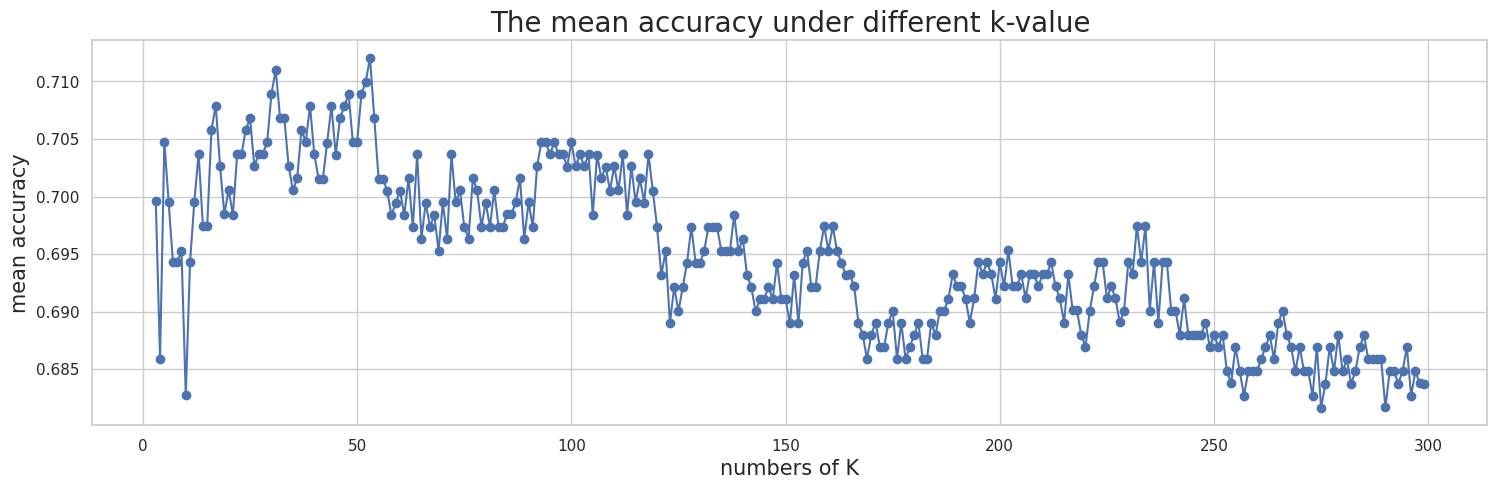

In [ ]:
#visualization all the k-values from the parameters that we gave
plt.figure(figsize=(18,5))
plt.plot(k_value_,mean_accuracy,'-o')
plt.grid(True)
plt.xlabel('numbers of K',fontsize = 15)
plt.ylabel('mean accuracy',fontsize = 15)
plt.title('The mean accuracy under different k-value',fontsize = 20)
plt.show()

In [ ]:
best_k = tunning_knn.best_params_['n_neighbors']
best_accuracy = tunning_knn.best_score_

print(best_k,best_accuracy)
#When k = 53, it performs the best average of correct rate.

53 0.712061403508772


In [ ]:
best_knn_clf = KNeighborsClassifier(n_neighbors=best_k)
best_knn_clf.fit(X_train,y_train)

result_for_train_set = best_knn_clf.predict(X_train)
result_for_test_set = best_knn_clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, result_for_train_set)
test_accuracy = accuracy_score(y_test, result_for_test_set)

print("Training Set Accuracy: ", train_accuracy)
print("Testing Set Accuracy: ", test_accuracy)

Training Set Accuracy:  0.7184873949579832
Testing Set Accuracy:  0.726890756302521


**Evaluation**

After tuning the k-value to enhance the performance of the KNN classification model, the test accuracy had increased from approximately 70.17% to around 72.69%, but the overall performance is not that accurate compared with the Logistic regression model.

However, only using an accuracy score to evaluate the model, especially in a medical diagnostic model may not be comprehensive enough. Confusion Matrix can clearly display these incorrect classifications, like the false positive or false negative. A false-positive result may lead to unnecessary concern or treatment, while a false-negative result may result in delayed treatment or missed treatment opportunities.
Hence, I also compared the confusion matrix of the two models.

#confusion matrix
confusion matrix consists of 4 parts, including True positve(TP),false negative(FN), true negative(TN) and True negative(TN).

- **True Negative (TN)**: The number of negative examples that the model correctly predicts as negative examples.
- **False Positive (FP)**: The number of negative examples that the model incorrectly predicted as positive examples.
- **False Negative (FN)**: The number of positive examples that the model incorrectly predicted as negative examples.
- **True Positive (TP)**: The number of positive examples correctly predicted by the model as positive examples.

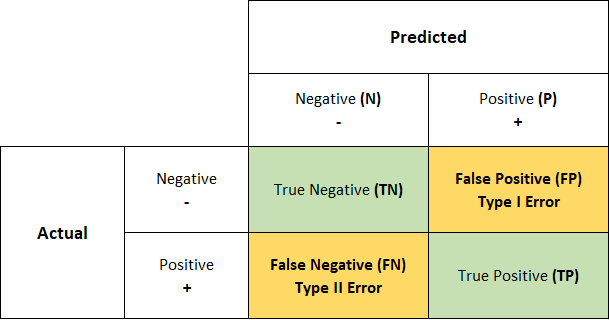

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_knn = best_knn_clf.predict(X_test)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)

In [ ]:
y_pred_log_r = log_r.predict(X_test)
conf_mat_log_r = confusion_matrix(y_test,y_pred_log_r)
cr_log_r = classification_report(y_test,y_pred_log_r)

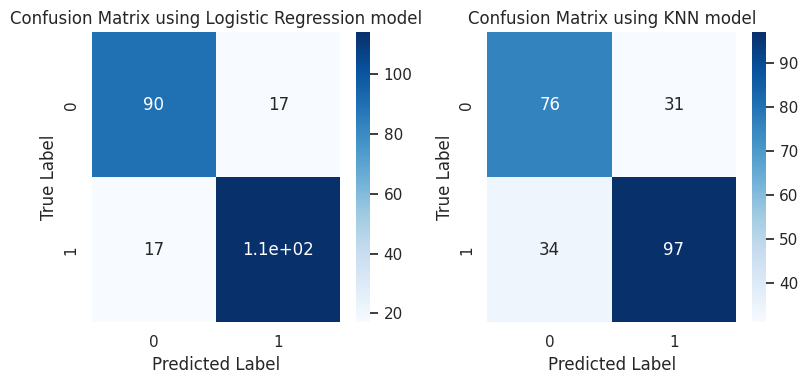

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.heatmap(conf_mat_log_r ,annot = True,cmap='Blues',xticklabels=[0, 1], yticklabels=[0, 1], ax=ax[0])
ax[0].set_title('Confusion Matrix using Logistic Regression model')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(conf_mat_knn ,annot = True,cmap='Blues',xticklabels=[0, 1], yticklabels=[0, 1], ax=ax[1])
ax[1].set_title('Confusion Matrix using KNN model')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

With these two confusion matrices, we can compare the performances of two models. Firstly, in Logistic model, it has

*   True negative(TN): 90 cases
*   False negative(FN): 17 cases
*   False positive(FP): 17 cases
*   True positive(TP): 110 cases

compared with KNN classification model:

*   True negative(TN): 76 cases
*   False negative(FN): 34 cases
*   False positive(FP): 31 cases
*   True positive(TP): 97 cases

It can be seen that both models have over 60% accuracy rates, but the numbers of incorrect classifications are almost twice as high in the KNN model than in the Logistic regression model, especially in the FN category. It means that if we use the KNN classification model to predict heart disease, we will have a higher chance to result in delayed treatment which is a fatal consequence may lead to the death of a patient. Therefore, the logistic regression model has better overall classification performance than the KNN classification model to predict heart disease.